In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import glob
import time

In [3]:

features_data = pd.read_csv('C:/Users/intel/Desktop/Mtech_Proj/Digital twin_29 Jan 2021/extractedData_Vib_Pow.csv',index_col=0)

In [14]:
##Prepare dataset
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.25)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2)

In [15]:
# Shuffle data
index = np.random.permutation(len(train_labels))
train_data, train_labels = train_data[index], train_labels[index]

print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape )

(2832, 32, 32) (2832,) (1180, 32, 32) (1180,)


In [16]:
def build_model(input_shape):
#     Generates RNN-LSTM model
#     return model: RNN-LSTM model

    # build network topology
    model = Sequential()

    # 2 LSTM layers
    model.add(layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(layers.LSTM(64))

    # dense layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(96, activation = 'relu')),
    
#     model.add(layers.Dropout(0.3))

    # output layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [17]:
train_data.shape,test_data.shape,val_data.shape

((2832, 32, 32), (1180, 32, 32), (708, 32, 32))

In [18]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [19]:
# create network
input_shape = (train_data.shape[1], train_data.shape[2])
model = build_model(input_shape)

In [20]:
# compile model
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32, 64)            24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 96)                6240      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                970       
Total params: 69,226
Trainable params: 69,226
Non-trainable params: 0
_________________________________________________________________


In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
# we are trying to min the thing that we are monitoring
early_stop

In [23]:
start = time.time()

history = model.fit(train_data, train_labels,epochs=45,validation_data=(val_data,val_labels)
          ,callbacks=[early_stop],batch_size = 128, verbose = 1)

stop = time.time()
print(f"Training time: {stop - start}s")

Train on 2832 samples, validate on 708 samples
Epoch 1/45
2832/2832 [==============================] - 3s 1ms/sample - loss: 0.3585 - accuracy: 0.8672 - val_loss: 0.3587 - val_accuracy: 0.8729
Epoch 2/45
2832/2832 [==============================] - 3s 1ms/sample - loss: 0.3473 - accuracy: 0.8722 - val_loss: 0.3830 - val_accuracy: 0.8658
Epoch 3/45
2832/2832 [==============================] - 3s 1ms/sample - loss: 0.3370 - accuracy: 0.8782 - val_loss: 0.3632 - val_accuracy: 0.8743
Epoch 4/45
2832/2832 [==============================] - 3s 977us/sample - loss: 0.3431 - accuracy: 0.8739 - val_loss: 0.3600 - val_accuracy: 0.8686
Epoch 5/45
2832/2832 [==============================] - 3s 954us/sample - loss: 0.3295 - accuracy: 0.8835 - val_loss: 0.3809 - val_accuracy: 0.8517
Epoch 6/45
2832/2832 [==============================] - 3s 1ms/sample - loss: 0.3246 - accuracy: 0.8838 - val_loss: 0.3496 - val_accuracy: 0.8644
Epoch 7/45
2832/2832 [==============================] - 3s 1ms/sample - l

In [92]:
def plot_history(history):
#   Plots accuracy/loss for training/validation set as a function of the epochs

    plt.figure(figsize=(50,25))
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


<Figure size 3600x1800 with 0 Axes>

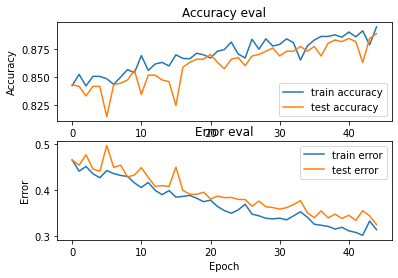

In [75]:
# plot accuracy/error for training and validation
plot_history(history)